In [1]:
# Importieren der benötigten Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

# Laden des Datensatzes
url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+TOI&format=csv"
#url = "https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+pscomppars&format=csv"
df = pd.read_csv(url)  # Ersetze durch tatsächlichen Dateipfad oder API-Zugriff

In [26]:
# Übersicht über die Variablen
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                7351 non-null   int64  
 1   toi                7351 non-null   float64
 2   toidisplay         7351 non-null   object 
 3   toipfx             7351 non-null   int64  
 4   ctoi_alias         7351 non-null   float64
 5   pl_pnum            7351 non-null   int64  
 6   tfopwg_disp        7339 non-null   object 
 7   st_tmag            7351 non-null   float64
 8   st_tmagerr1        7351 non-null   float64
 9   st_tmagerr2        7351 non-null   float64
 10  st_tmagsymerr      7351 non-null   int64  
 11  st_tmaglim         7351 non-null   int64  
 12  rastr              7351 non-null   object 
 13  ra                 7351 non-null   float64
 14  raerr1             0 non-null      float64
 15  raerr2             0 non-null      float64
 16  rasymerr           0 non

In [27]:
# Statistische Kennzahlen
print(df.describe())

                tid          toi       toipfx    ctoi_alias      pl_pnum  \
count  7.351000e+03  7351.000000  7351.000000  7.351000e+03  7351.000000   
mean   2.455513e+08  3581.823032  3581.812543  2.455513e+08     1.048973   
std    1.629864e+08  2053.431493  2053.431845  1.629864e+08     0.268625   
min    2.876000e+03   101.010000   101.000000  2.876010e+03     1.000000   
25%    1.314198e+08  1786.510000  1786.500000  1.314198e+08     1.000000   
50%    2.483872e+08  3564.010000  3564.000000  2.483872e+08     1.000000   
75%    3.540192e+08  5367.510000  5367.500000  3.540192e+08     1.000000   
max    2.041563e+09  7169.010000  7169.000000  2.041563e+09     5.000000   

           st_tmag  st_tmagerr1  st_tmagerr2  st_tmagsymerr  st_tmaglim  ...  \
count  7351.000000  7351.000000  7351.000000         7351.0      7351.0  ...   
mean     11.528373     0.010008    -0.010008            1.0         0.0  ...   
std       1.637605     0.033252     0.033252            0.0         0.0  ..

In [30]:
matching_columns = df.columns[df.columns.str.contains("per")]
print("Gefundene Spalten:", matching_columns.tolist())

Gefundene Spalten: ['pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbpersymerr', 'pl_orbperlim', 'pl_trandeperr1', 'pl_trandeperr2']


Struktur des Datensatzes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                7351 non-null   int64  
 1   toi                7351 non-null   float64
 2   toidisplay         7351 non-null   object 
 3   toipfx             7351 non-null   int64  
 4   ctoi_alias         7351 non-null   float64
 5   pl_pnum            7351 non-null   int64  
 6   tfopwg_disp        7339 non-null   object 
 7   st_tmag            7351 non-null   float64
 8   st_tmagerr1        7351 non-null   float64
 9   st_tmagerr2        7351 non-null   float64
 10  st_tmagsymerr      7351 non-null   int64  
 11  st_tmaglim         7351 non-null   int64  
 12  rastr              7351 non-null   object 
 13  ra                 7351 non-null   float64
 14  raerr1             0 non-null      float64
 15  raerr2             0 non-null      float64
 16

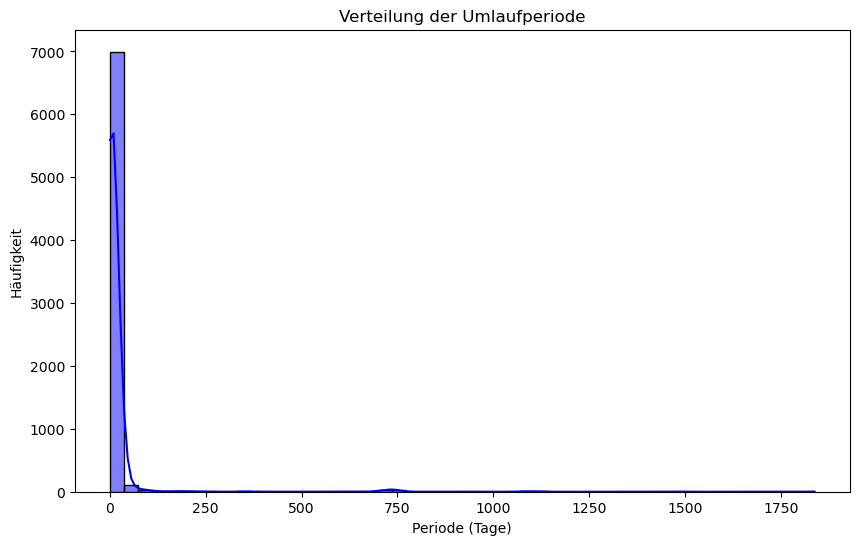

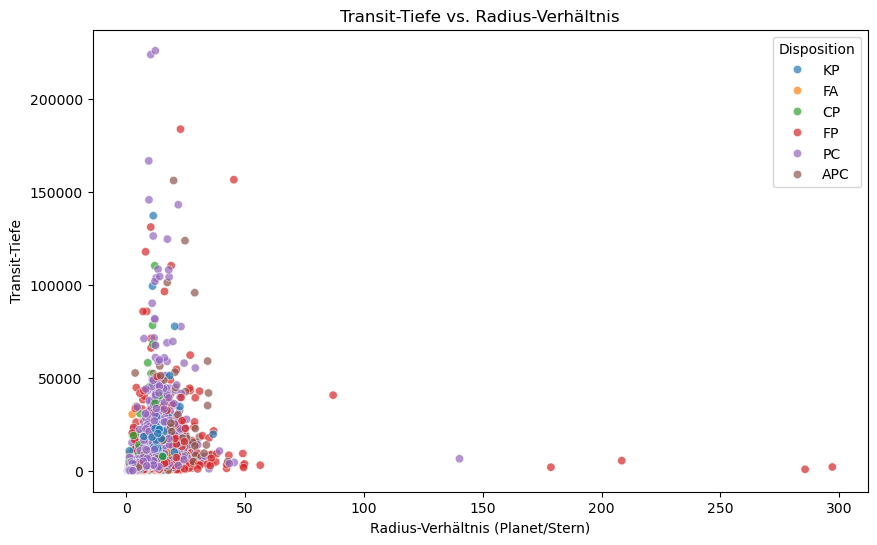

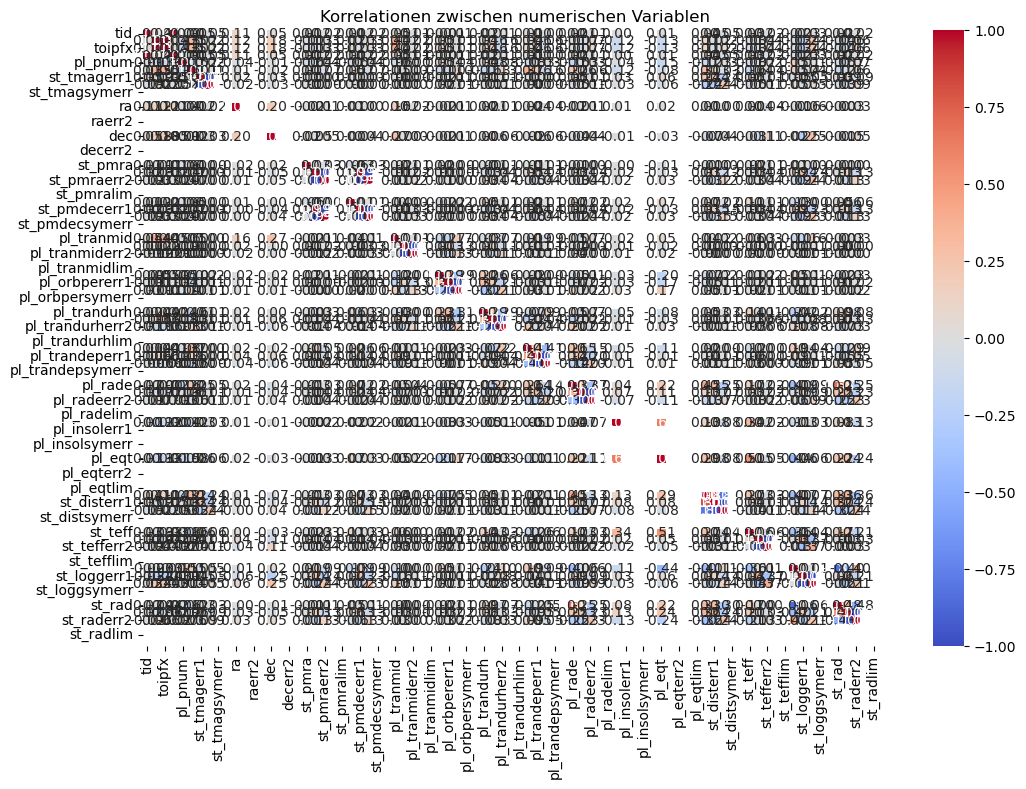

In [32]:
# Übersicht über die Variablen im Datensatz
print("Struktur des Datensatzes:")
print(df.info())

# Statistische Übersicht der numerischen Daten
print("Statistische Kennzahlen:")
print(df.describe())

# Visualisierung 1: Verteilung der Umlaufperiode (Period)
plt.figure(figsize=(10, 6))
sns.histplot(df['pl_orbper'], bins=50, kde=True, color='blue')  # 'pl_orbper' ist die Umlaufperiode
plt.title('Verteilung der Umlaufperiode')
plt.xlabel('Periode (Tage)')
plt.ylabel('Häufigkeit')
plt.show()

# Visualisierung 2: Transit-Tiefe vs. Radius-Verhältnis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='pl_rade',  # Radius-Verhältnis (Planet/Stern)
    y='pl_trandep',  # Transit-Tiefe
    hue='tfopwg_disp',  # Klassifikation
    alpha=0.7
)
plt.title('Transit-Tiefe vs. Radius-Verhältnis')
plt.xlabel('Radius-Verhältnis (Planet/Stern)')
plt.ylabel('Transit-Tiefe')
plt.legend(title='Disposition')
plt.show()

# Visualisierung 3: Heatmap der Korrelationen
correlation_matrix = df.corr(numeric_only=True)  # Nur numerische Spalten
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationen zwischen numerischen Variablen')
plt.show()

In [39]:
df.columns.isnull

<bound method Index.isna of Index(['tid', 'toi', 'toidisplay', 'toipfx', 'ctoi_alias', 'pl_pnum',
       'tfopwg_disp', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmagsymerr',
       'st_tmaglim', 'rastr', 'ra', 'raerr1', 'raerr2', 'rasymerr', 'decstr',
       'dec', 'decerr1', 'decerr2', 'decsymerr', 'st_pmra', 'st_pmraerr1',
       'st_pmraerr2', 'st_pmrasymerr', 'st_pmralim', 'st_pmdec',
       'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdecsymerr', 'st_pmdeclim',
       'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidsymerr',
       'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2',
       'pl_orbpersymerr', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1',
       'pl_trandurherr2', 'pl_trandurhsymerr', 'pl_trandurhlim', 'pl_trandep',
       'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandepsymerr', 'pl_trandeplim',
       'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radesymerr', 'pl_radelim',
       'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insolsymerr',
 

In [49]:
null_columns = df.columns[df.isnull().all()]

In [50]:
df_clean = df.drop(columns=null_columns)

Struktur des Datensatzes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                7351 non-null   int64  
 1   toi                7351 non-null   float64
 2   toidisplay         7351 non-null   object 
 3   toipfx             7351 non-null   int64  
 4   ctoi_alias         7351 non-null   float64
 5   pl_pnum            7351 non-null   int64  
 6   tfopwg_disp        7339 non-null   object 
 7   st_tmag            7351 non-null   float64
 8   st_tmagerr1        7351 non-null   float64
 9   st_tmagerr2        7351 non-null   float64
 10  st_tmagsymerr      7351 non-null   int64  
 11  st_tmaglim         7351 non-null   int64  
 12  rastr              7351 non-null   object 
 13  ra                 7351 non-null   float64
 14  decstr             7351 non-null   object 
 15  dec                7351 non-null   float64
 16

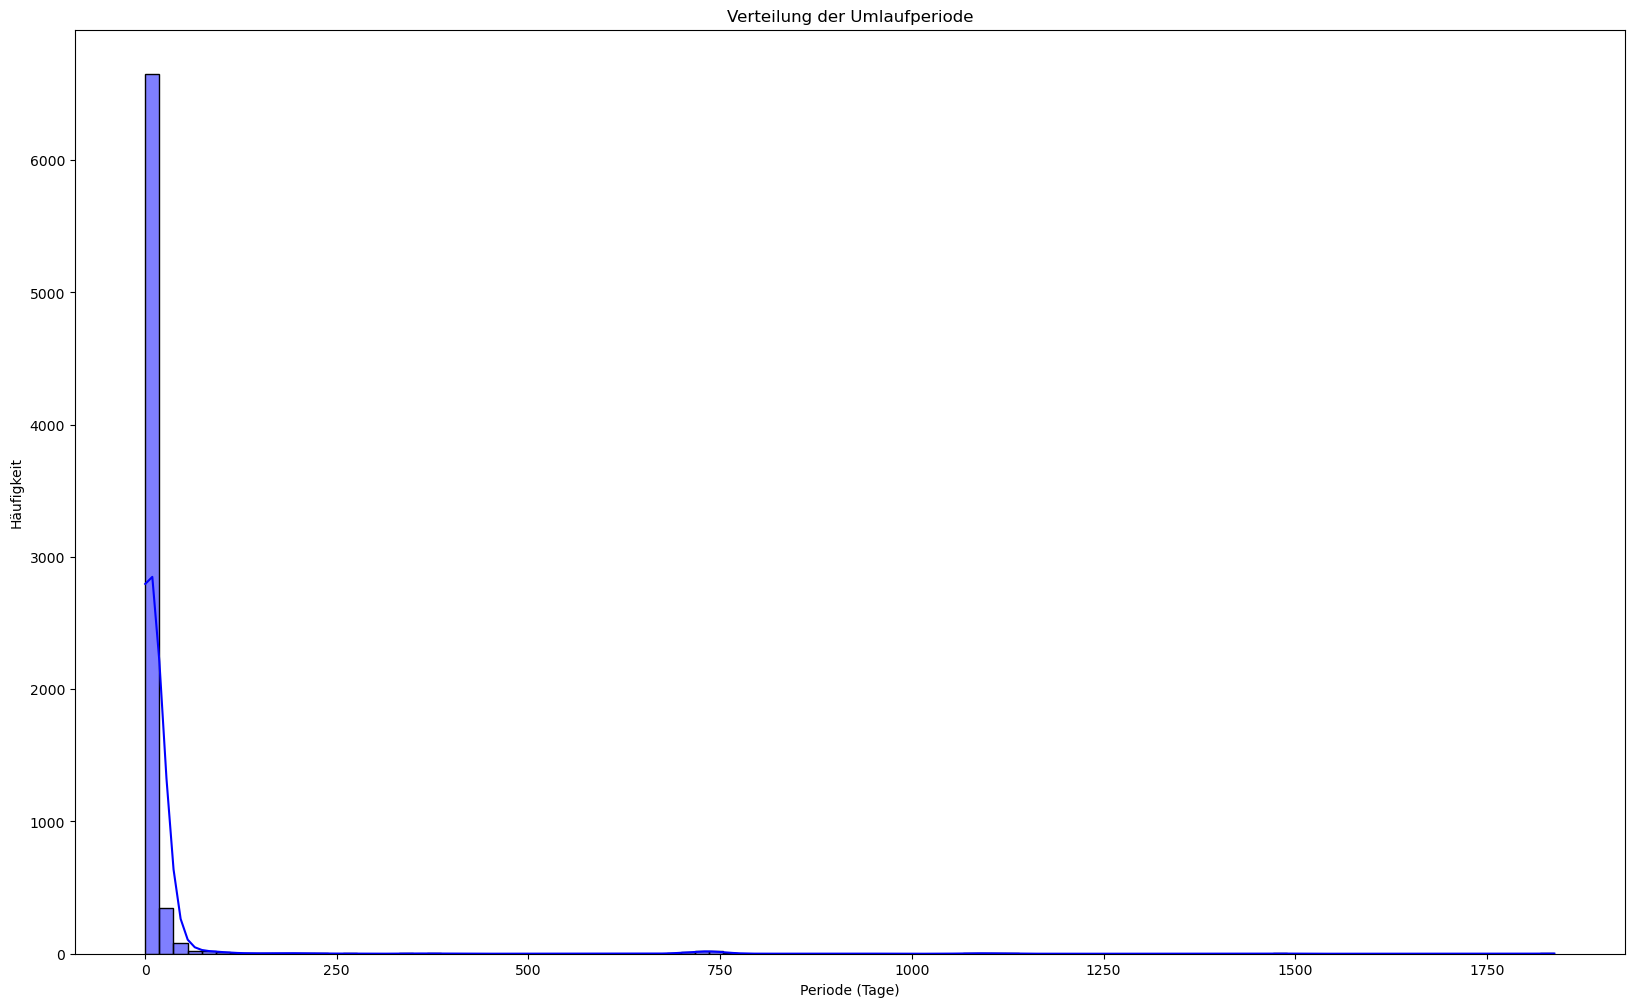

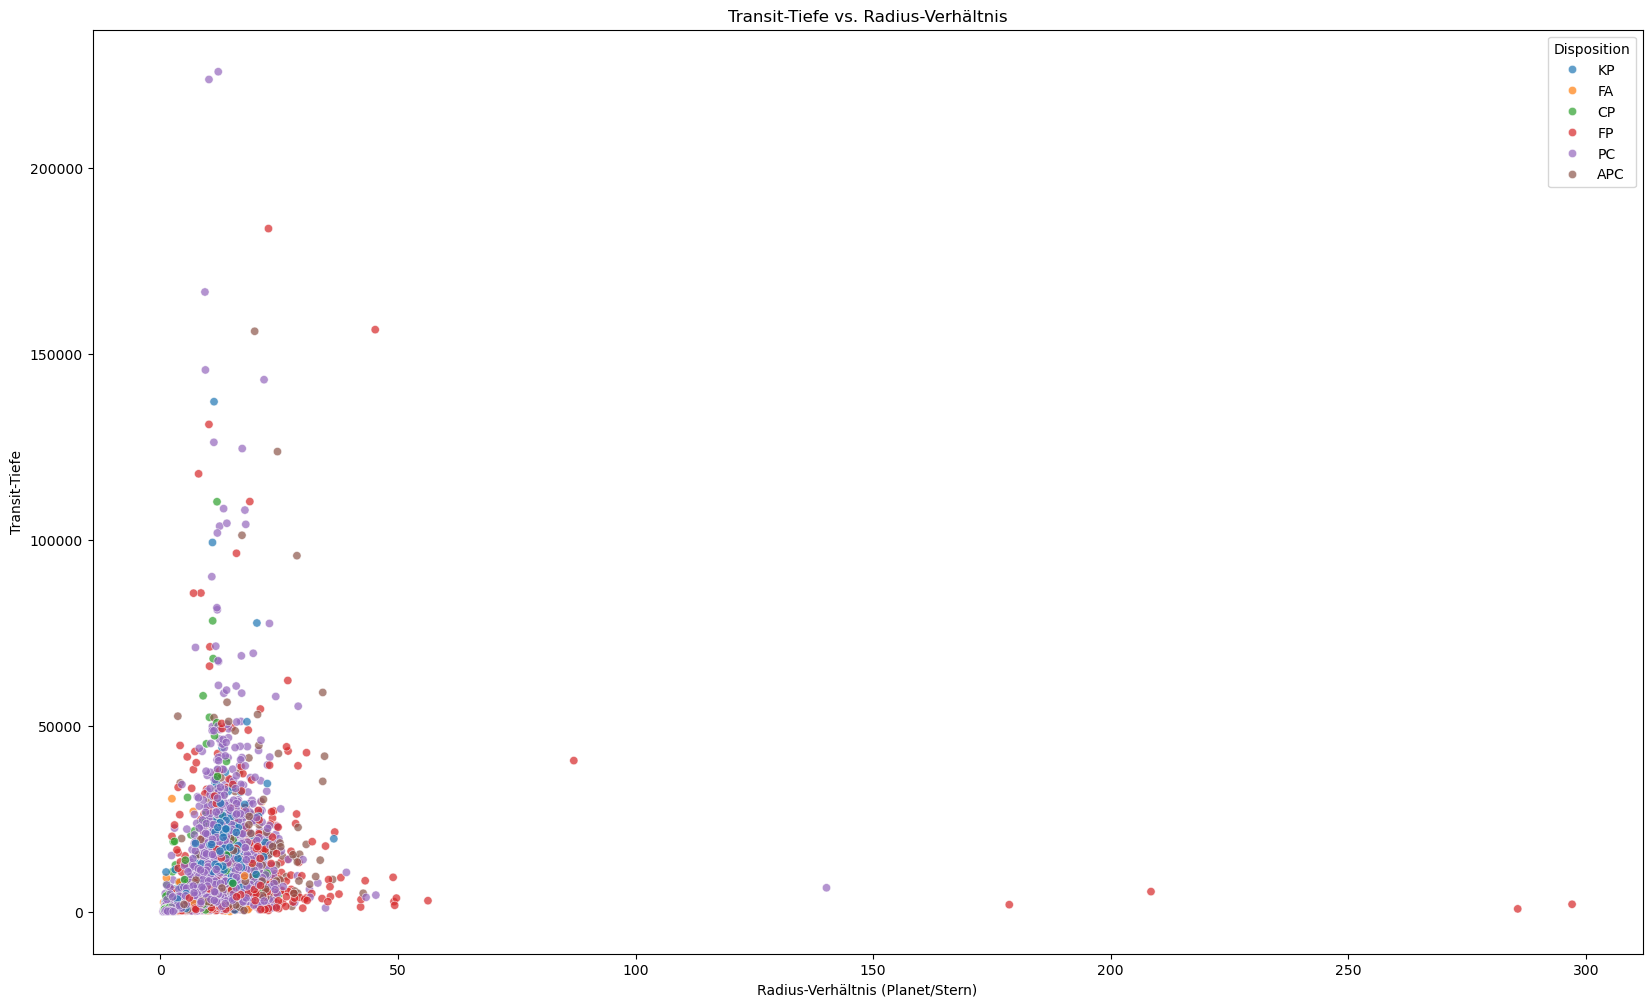

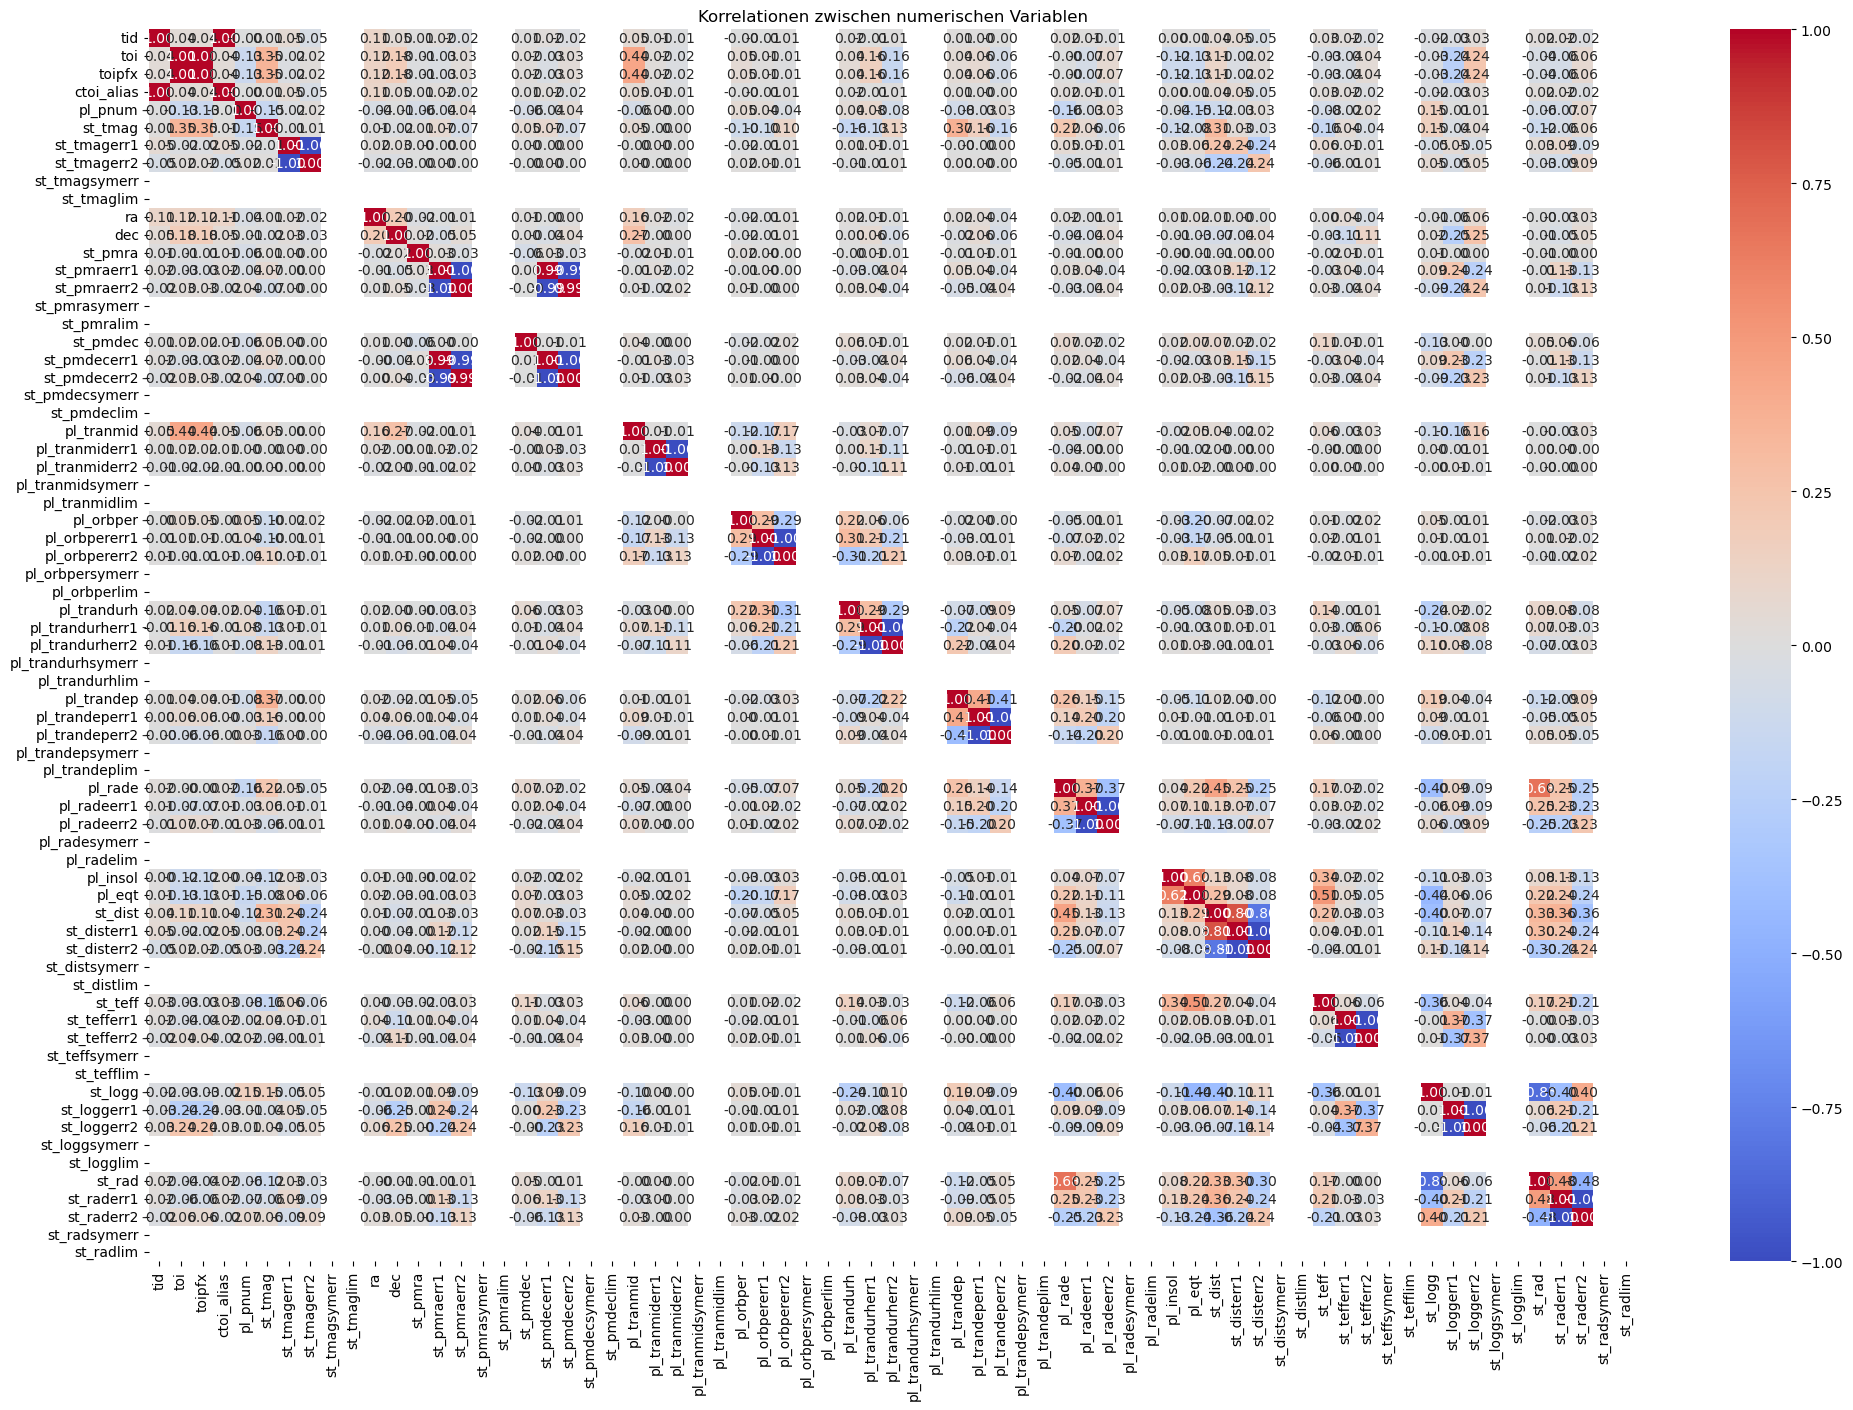

In [53]:
# Übersicht über die Variablen im Datensatz
print("Struktur des Datensatzes:")
print(df_clean.info())

# Statistische Übersicht der numerischen Daten
print("Statistische Kennzahlen:")
print(df_clean.describe())

# Visualisierung 1: Verteilung der Umlaufperiode (Period)
plt.figure(figsize=(20, 12))
sns.histplot(df_clean['pl_orbper'], bins=100, kde=True, color='blue')  # 'pl_orbper' ist die Umlaufperiode
plt.title('Verteilung der Umlaufperiode')
plt.xlabel('Periode (Tage)')
plt.ylabel('Häufigkeit')
plt.show()

# Visualisierung 2: Transit-Tiefe vs. Radius-Verhältnis
plt.figure(figsize=(20, 12))
sns.scatterplot(
    data=df_clean,
    x='pl_rade',  # Radius-Verhältnis (Planet/Stern)
    y='pl_trandep',  # Transit-Tiefe
    hue='tfopwg_disp',  # Klassifikation
    alpha=0.7
)
plt.title('Transit-Tiefe vs. Radius-Verhältnis')
plt.xlabel('Radius-Verhältnis (Planet/Stern)')
plt.ylabel('Transit-Tiefe')
plt.legend(title='Disposition')
plt.show()

# Visualisierung 3: Heatmap der Korrelationen
correlation_matrix = df_clean.corr(numeric_only=True)  # Nur numerische Spalten
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Korrelationen zwischen numerischen Variablen')
plt.show()

Struktur des Datensatzes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                7351 non-null   int64  
 1   toi                7351 non-null   float64
 2   toidisplay         7351 non-null   object 
 3   toipfx             7351 non-null   int64  
 4   ctoi_alias         7351 non-null   float64
 5   pl_pnum            7351 non-null   int64  
 6   tfopwg_disp        7339 non-null   object 
 7   st_tmag            7351 non-null   float64
 8   st_tmagerr1        7351 non-null   float64
 9   st_tmagerr2        7351 non-null   float64
 10  st_tmagsymerr      7351 non-null   int64  
 11  st_tmaglim         7351 non-null   int64  
 12  rastr              7351 non-null   object 
 13  ra                 7351 non-null   float64
 14  decstr             7351 non-null   object 
 15  dec                7351 non-null   float64
 16

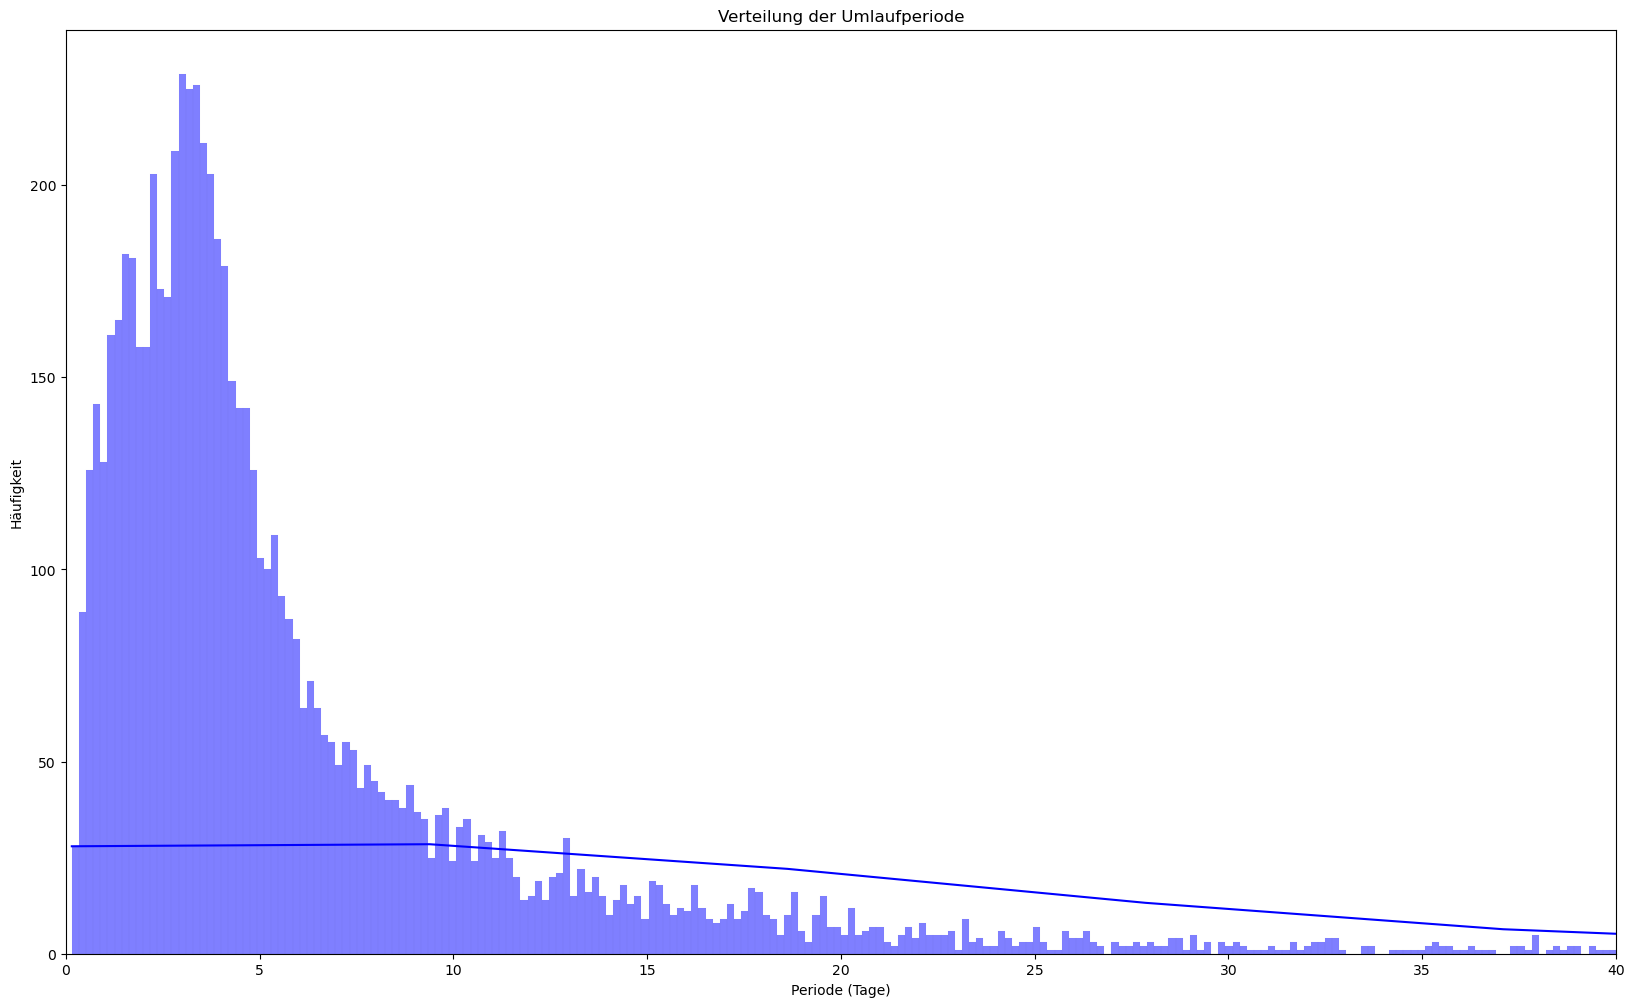

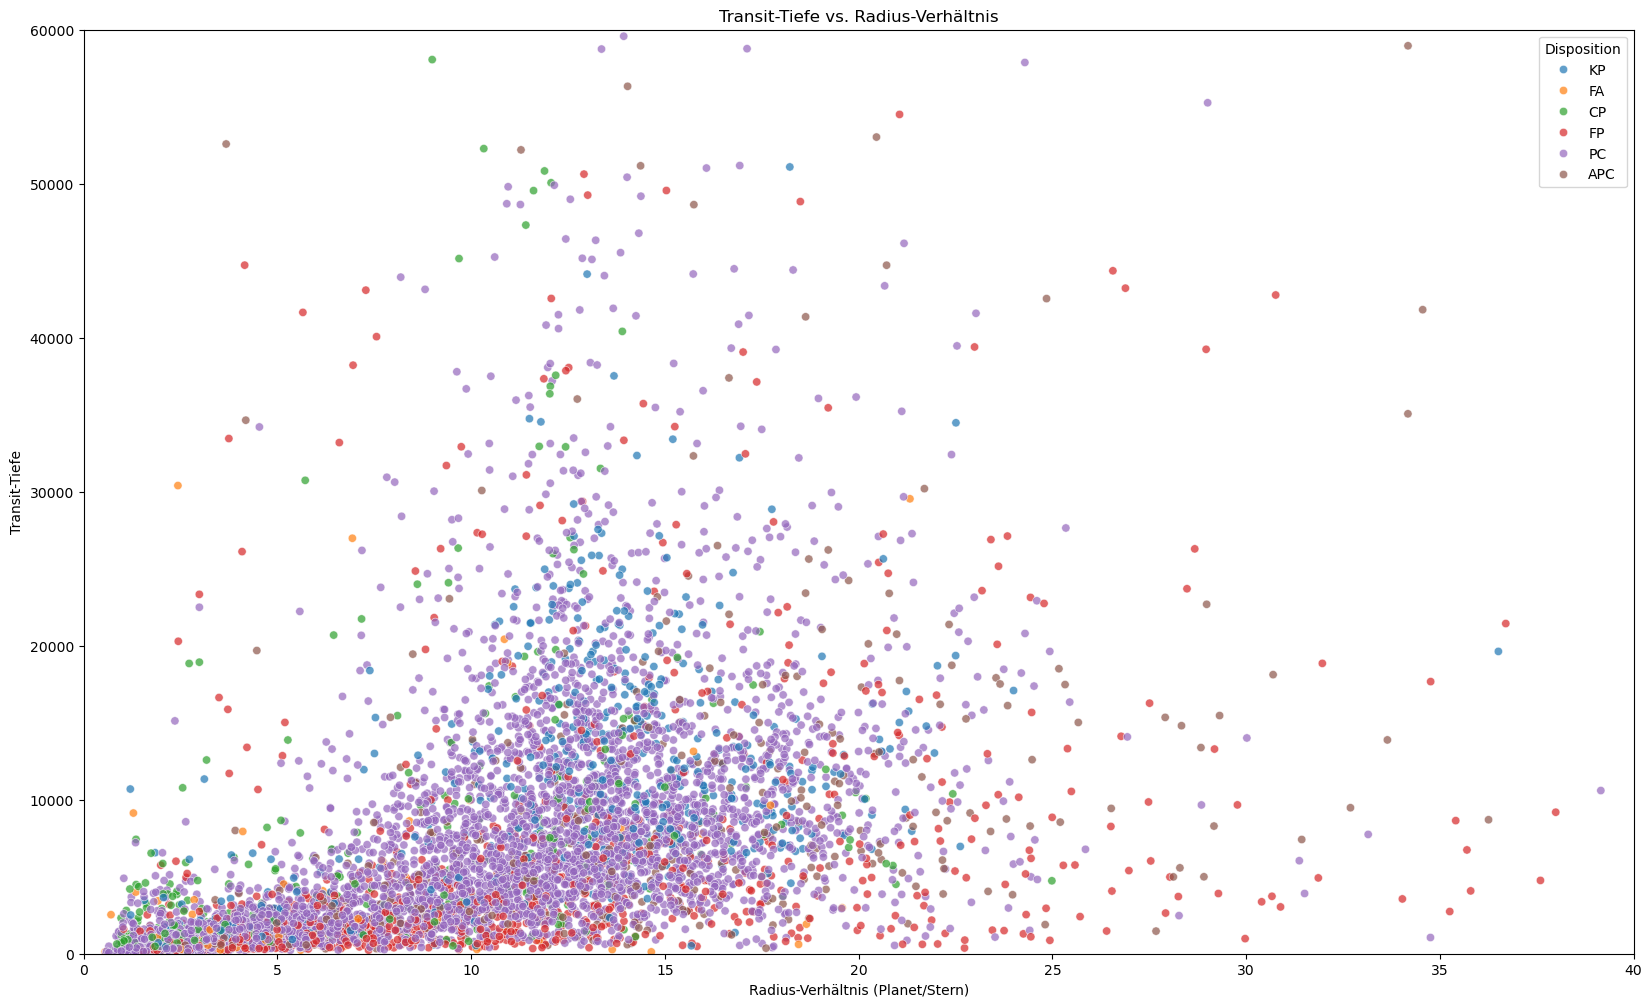

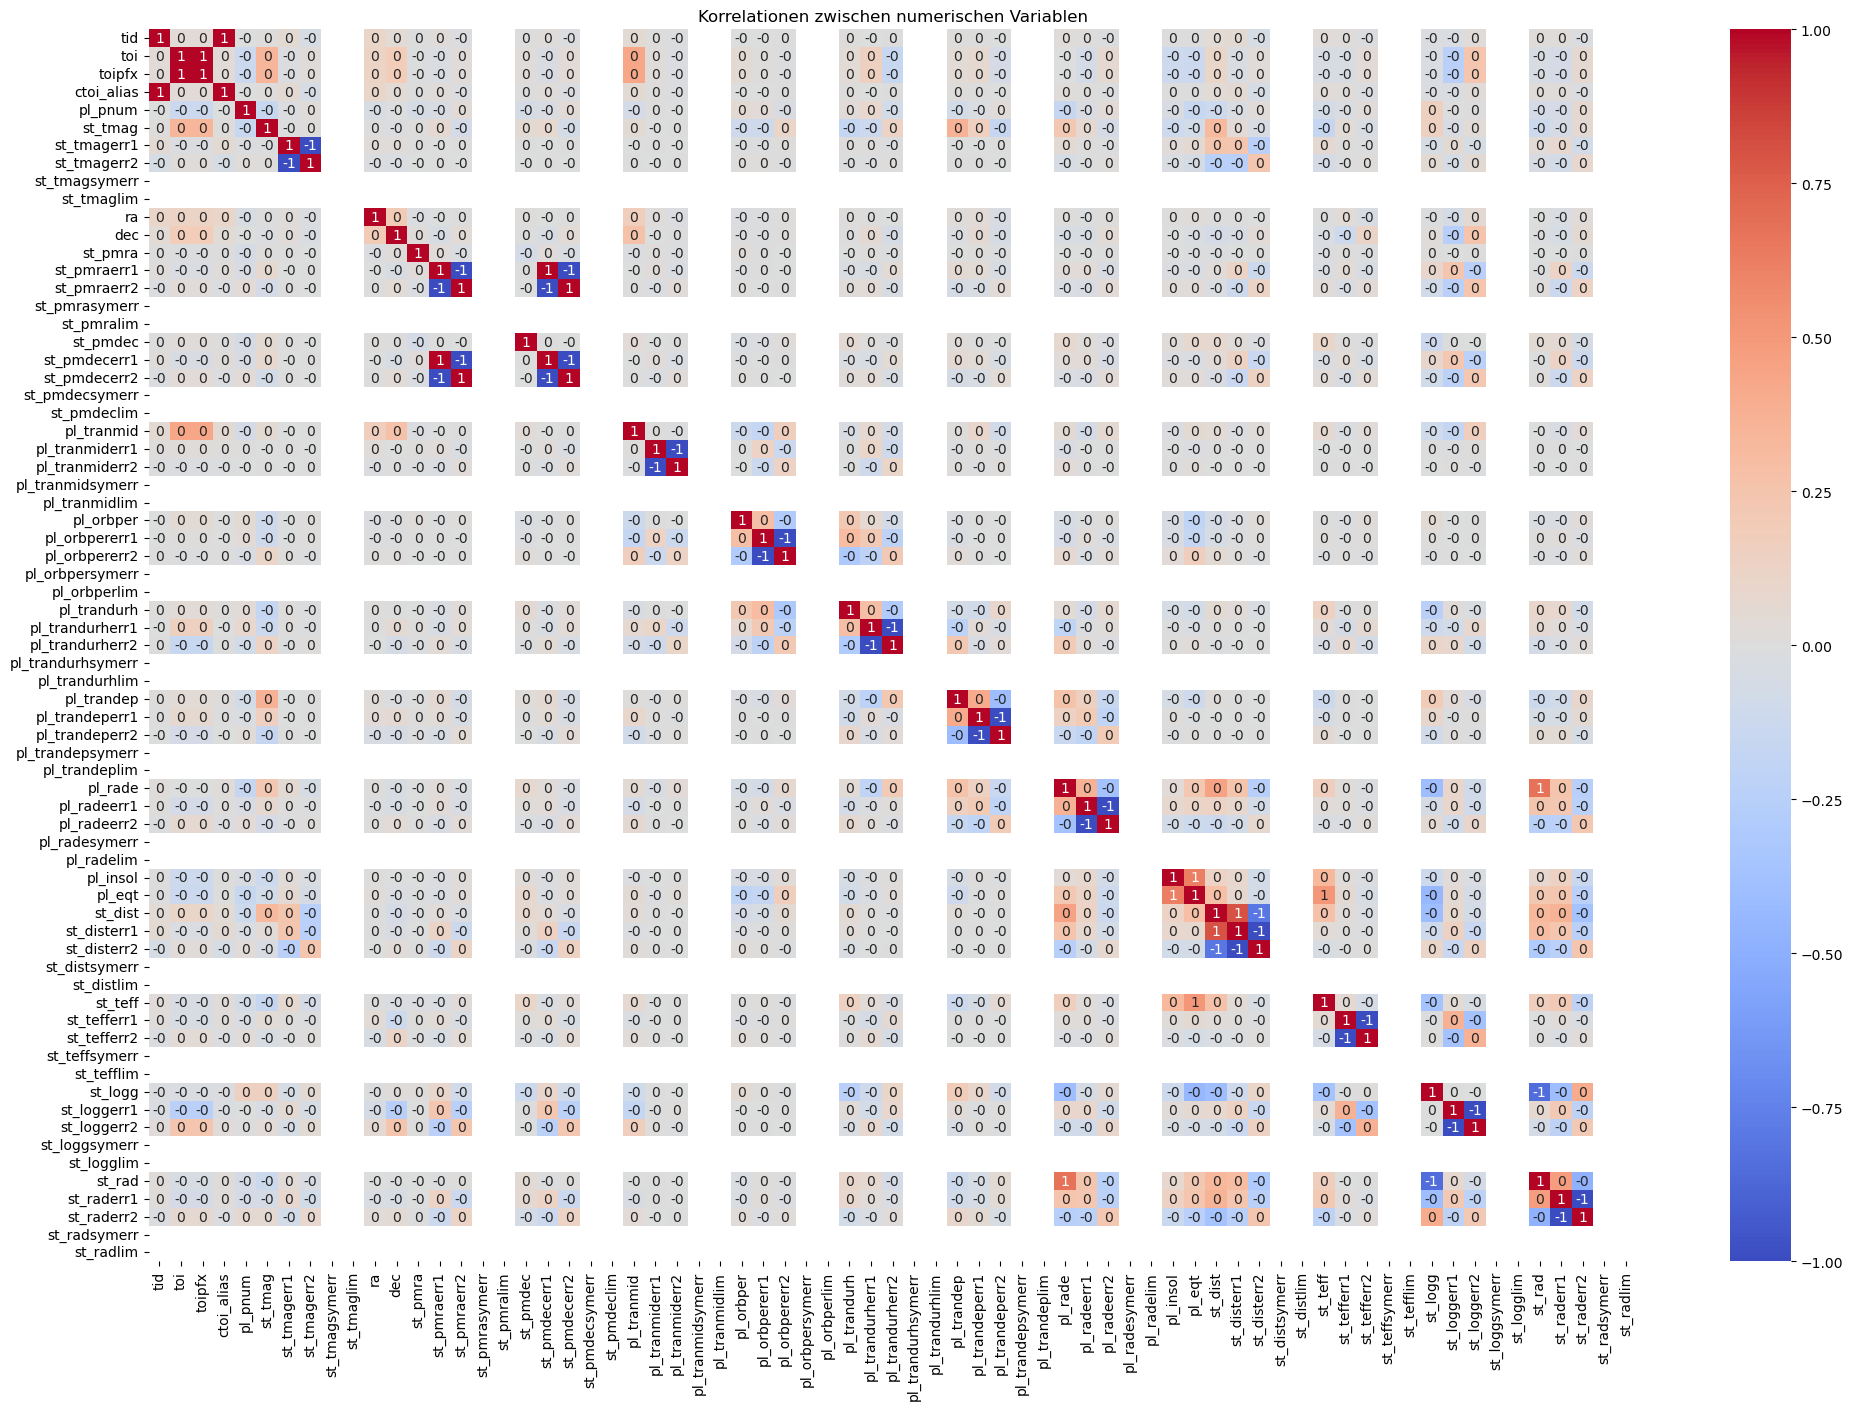

In [62]:
# Übersicht über die Variablen im Datensatz
print("Struktur des Datensatzes:")
print(df_clean.info())

# Statistische Übersicht der numerischen Daten
print("Statistische Kennzahlen:")
print(df_clean.describe())

# Visualisierung 1: Verteilung der Umlaufperiode (Period)
plt.figure(figsize=(20, 12))
sns.histplot(df_clean['pl_orbper'], bins=10000, kde=True, color='blue')  # 'pl_orbper' ist die Umlaufperiode
plt.title('Verteilung der Umlaufperiode')
plt.xlabel('Periode (Tage)')
plt.ylabel('Häufigkeit')
plt.xlim(0, 40)
plt.show()

# Visualisierung 2: Transit-Tiefe vs. Radius-Verhältnis
plt.figure(figsize=(20, 12))
sns.scatterplot(
    data=df_clean,
    x='pl_rade',  # Radius-Verhältnis (Planet/Stern)
    y='pl_trandep',  # Transit-Tiefe
    hue='tfopwg_disp',  # Klassifikation
    alpha=0.7
)
plt.title('Transit-Tiefe vs. Radius-Verhältnis')
plt.xlabel('Radius-Verhältnis (Planet/Stern)')
plt.ylabel('Transit-Tiefe')
plt.legend(title='Disposition')
plt.xlim(0, 40)
plt.ylim(0, 60_000)
plt.show()

# Visualisierung 3: Heatmap der Korrelationen
correlation_matrix = df_clean.corr(numeric_only=True)  # Nur numerische Spalten
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=True)
plt.title('Korrelationen zwischen numerischen Variablen')
plt.show()

In [72]:
df_only_num = df_clean.select_dtypes(include='number')
df_only_num = df_only_num.dropna(axis=1, how='all')
print(df_only_num.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7351 entries, 0 to 7350
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tid                7351 non-null   int64  
 1   toi                7351 non-null   float64
 2   toipfx             7351 non-null   int64  
 3   ctoi_alias         7351 non-null   float64
 4   pl_pnum            7351 non-null   int64  
 5   st_tmag            7351 non-null   float64
 6   st_tmagerr1        7351 non-null   float64
 7   st_tmagerr2        7351 non-null   float64
 8   st_tmagsymerr      7351 non-null   int64  
 9   st_tmaglim         7351 non-null   int64  
 10  ra                 7351 non-null   float64
 11  dec                7351 non-null   float64
 12  st_pmra            7224 non-null   float64
 13  st_pmraerr1        7224 non-null   float64
 14  st_pmraerr2        7224 non-null   float64
 15  st_pmrasymerr      7224 non-null   float64
 16  st_pmralim         7224 

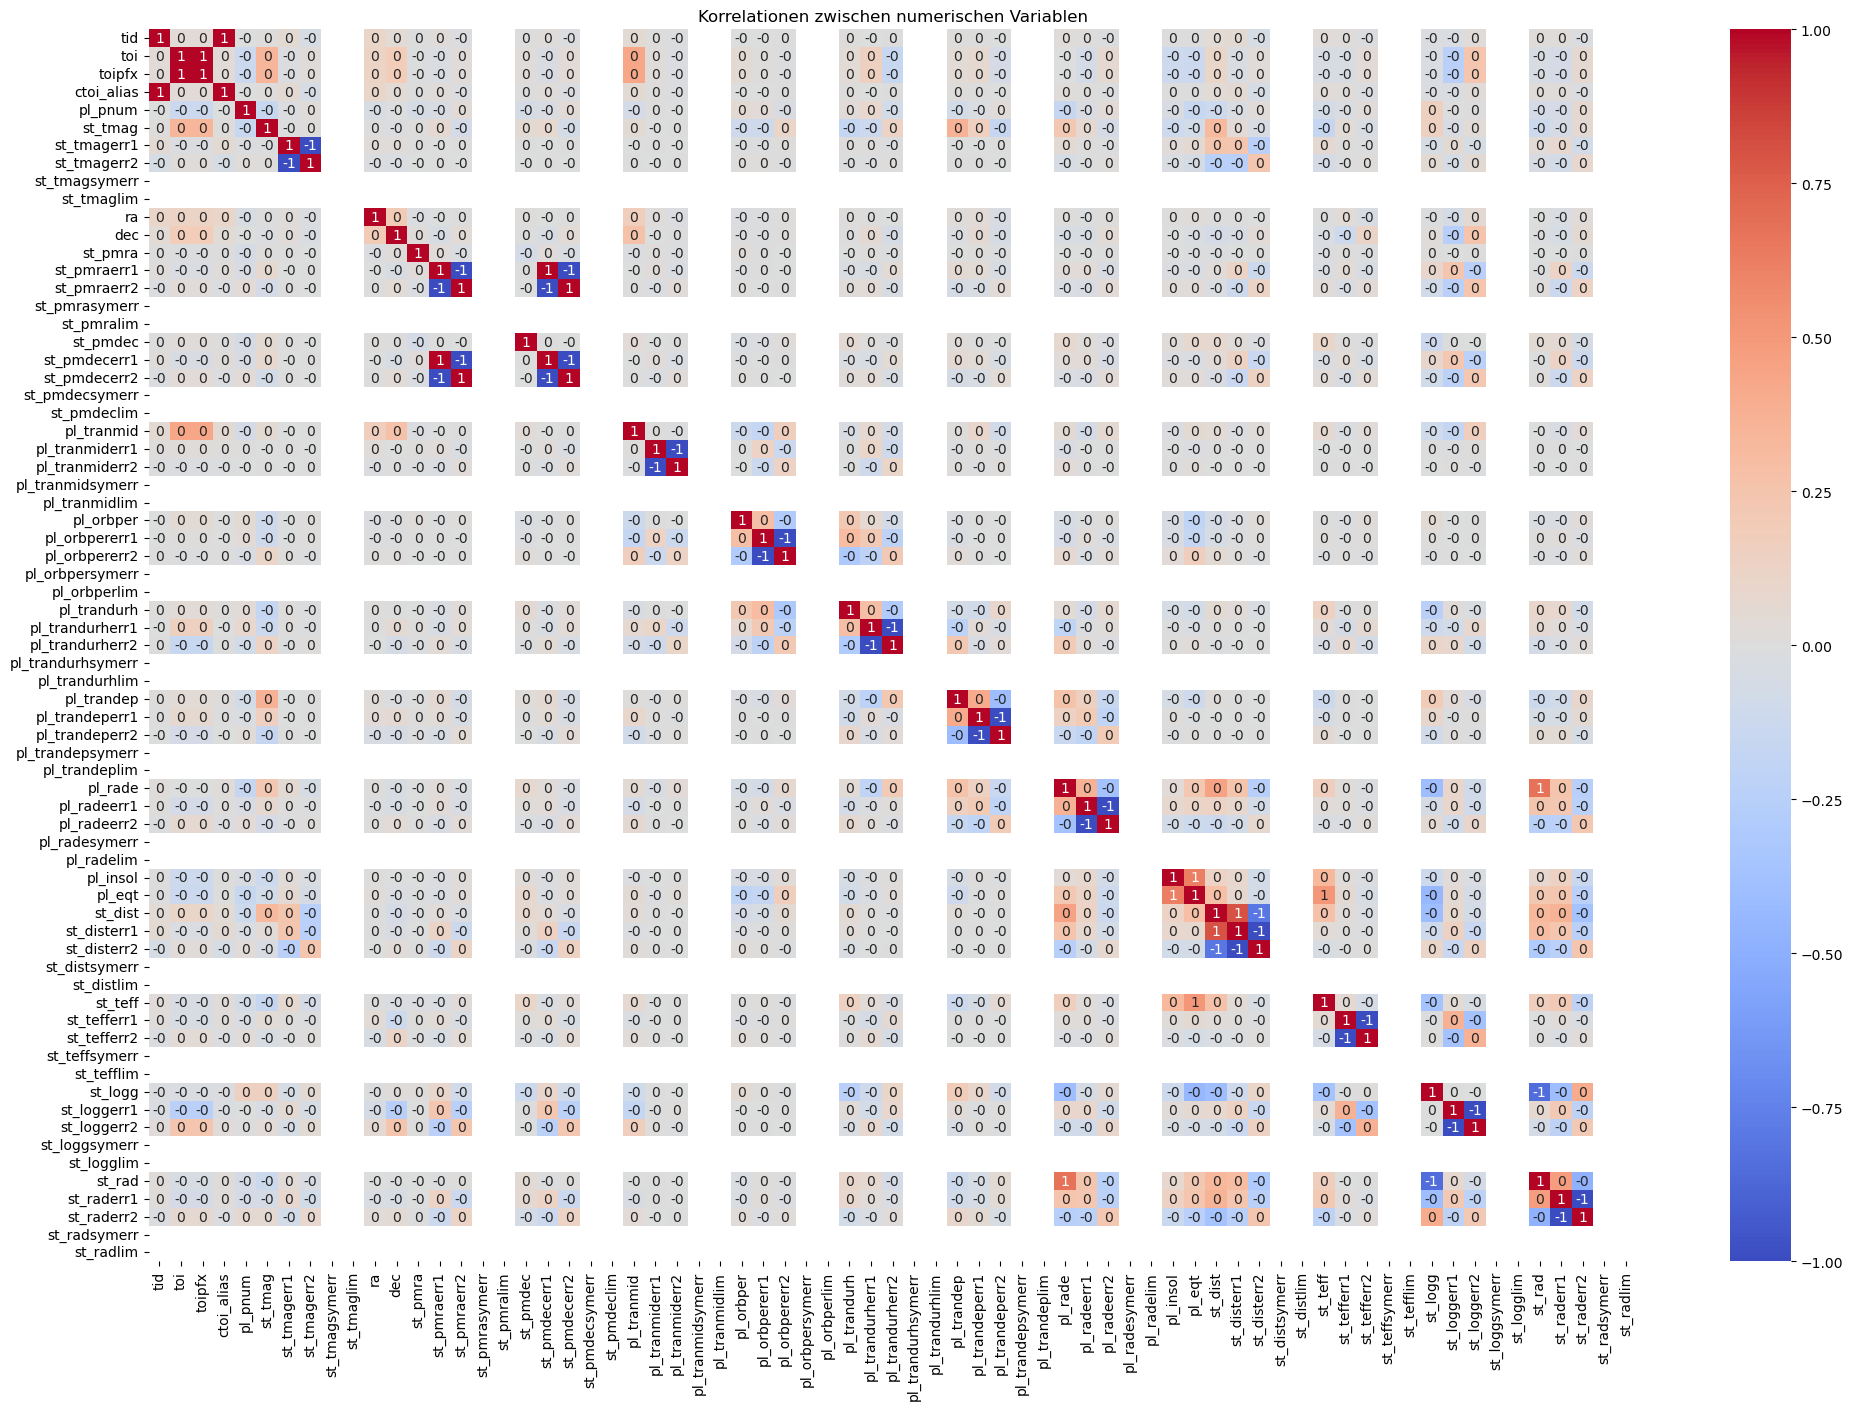

In [66]:
# Visualisierung 3: Heatmap der Korrelationen
correlation_matrix = df_only_num.corr(numeric_only=True)  # Nur numerische Spalten
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=True)
plt.title('Korrelationen zwischen numerischen Variablen')
plt.show()

In [69]:
print(df_only_num['st_tmaglim'])

0       0
1       0
2       0
3       0
4       0
       ..
7346    0
7347    0
7348    0
7349    0
7350    0
Name: st_tmaglim, Length: 7351, dtype: int64


In [83]:
# Identify columns where all values are either 1 or 0
binary_columns = df_only_num.columns[(df_only_num.apply(lambda col: col.isin([0, 1]).all()))]

# Drop columns where all values are either 1 or 0
df_no_binarys = df_only_num.drop(columns=binary_columns)

In [87]:
df_no_binarys = df_no_binarys.dropna()

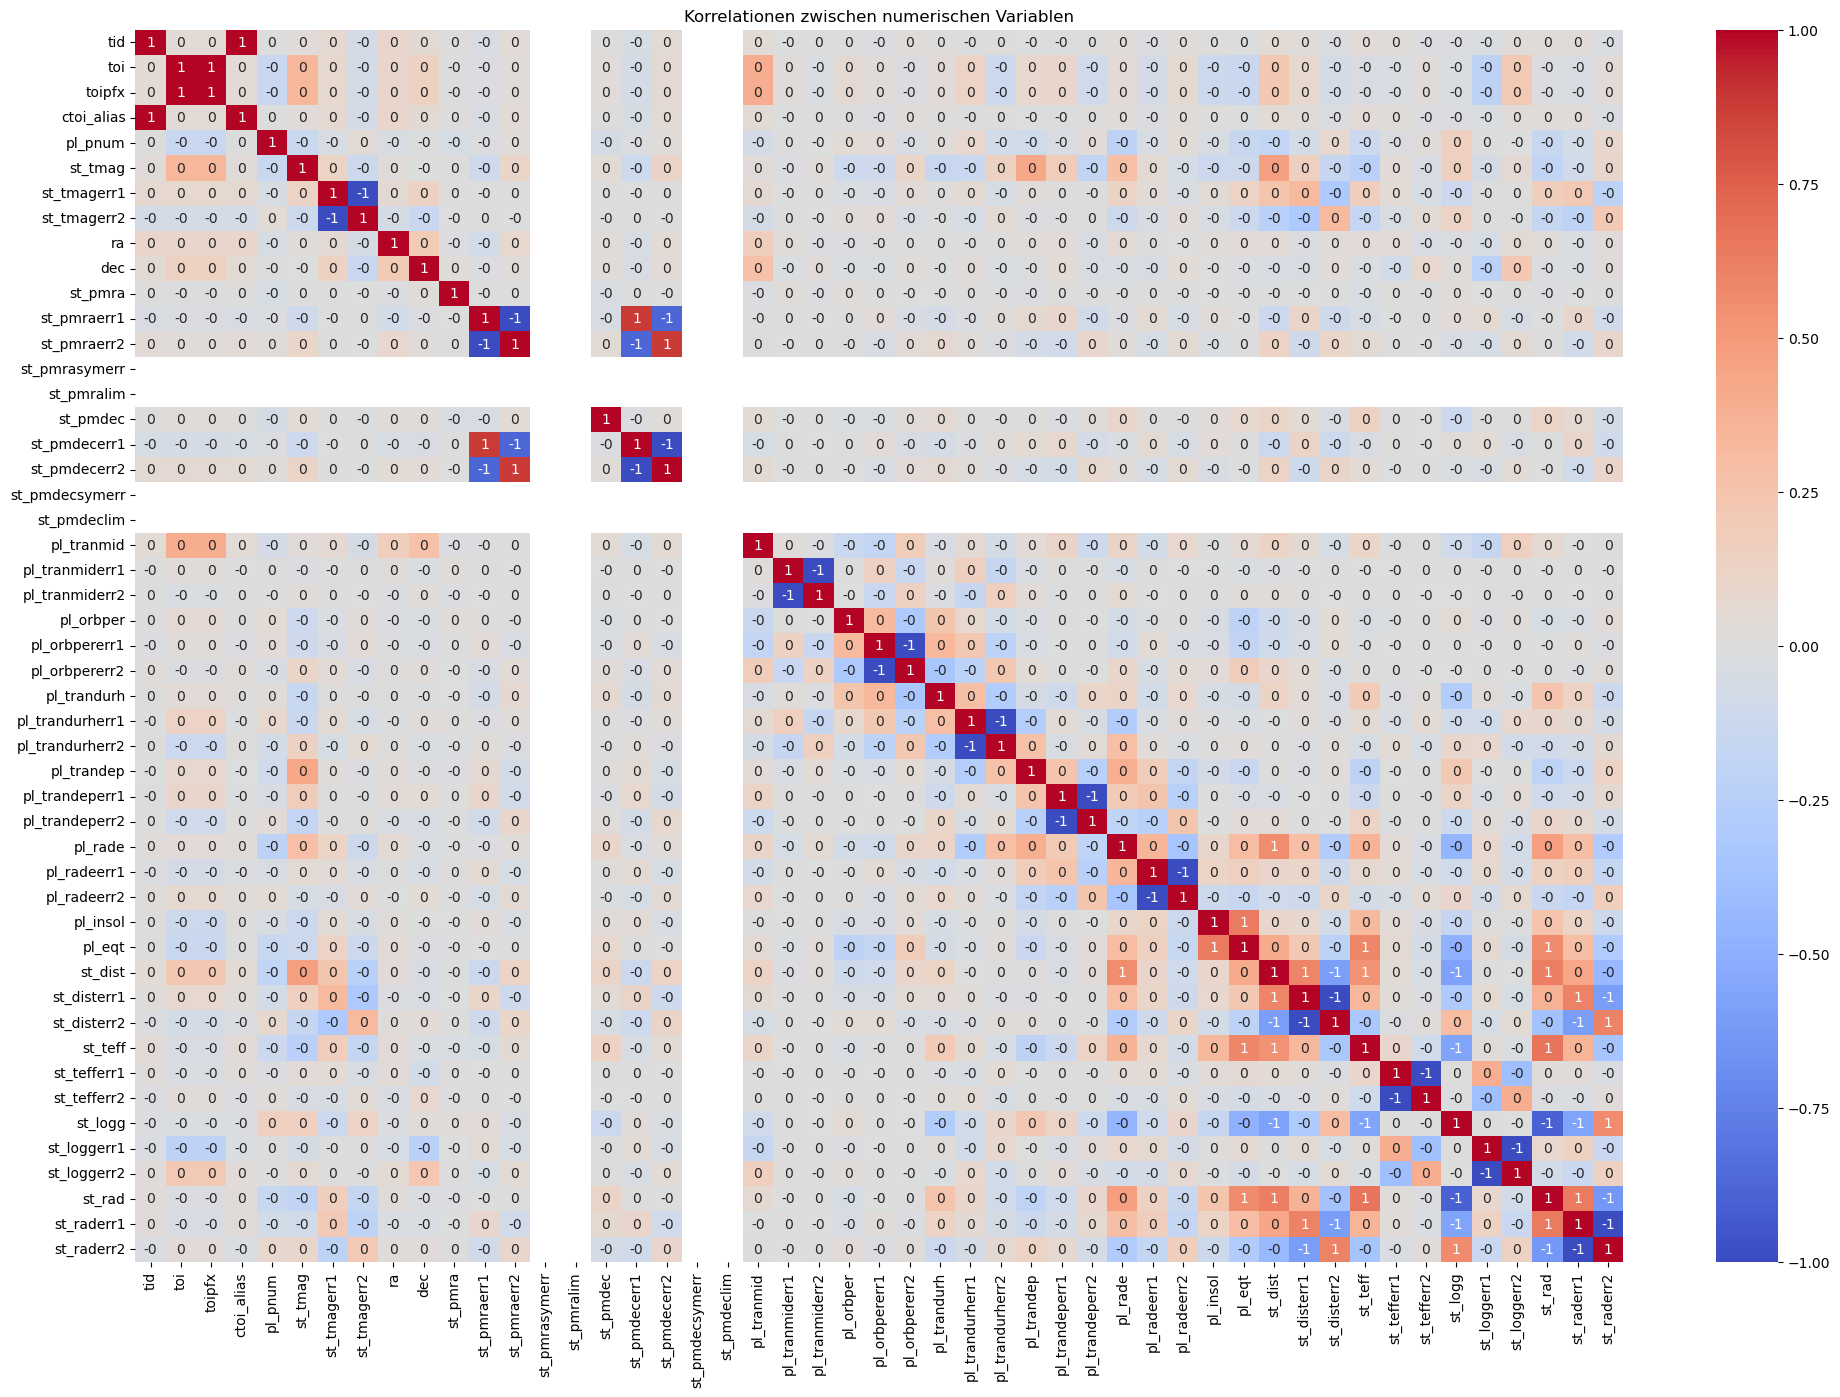

In [88]:
# Visualisierung 3: Heatmap der Korrelationen
correlation_matrix = df_no_binarys.corr(numeric_only=True)  # Nur numerische Spalten
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".0f", cmap='coolwarm', cbar=True)
plt.title('Korrelationen zwischen numerischen Variablen')
plt.show()

In [75]:
print(df_no_binarys['pl_insolerr1'])

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7346   NaN
7347   NaN
7348   NaN
7349   NaN
7350   NaN
Name: pl_insolerr1, Length: 7351, dtype: float64
